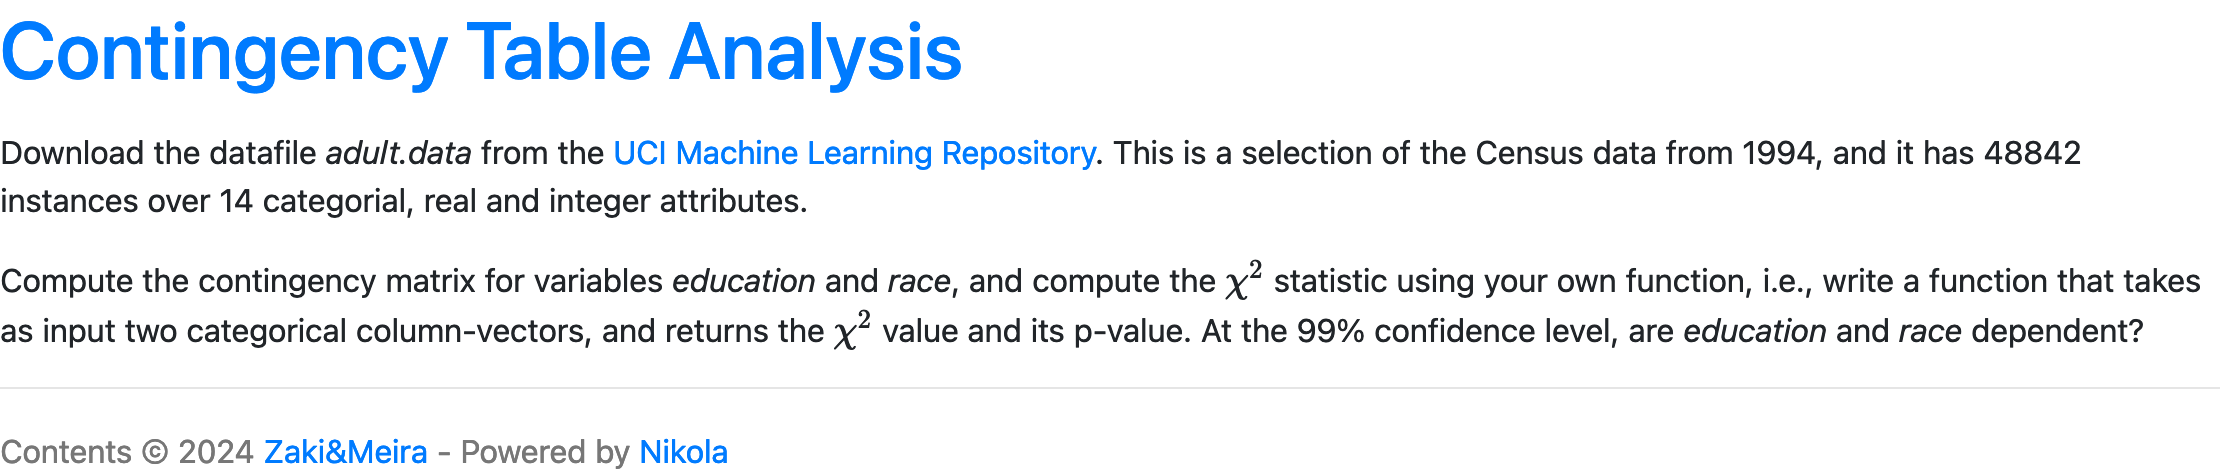

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import itertools

In [2]:
!cat data/adult/adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [3]:
df = pd.read_csv('data/adult/adult.data', header=None)

In [4]:
df.columns = ['age', 
              'workclass', 
              'fnlwgt', 
              'education', 
              'education_num', 
              'marital_status', 
              'occupation', 
              'relationship', 
              'race', 
              'sex', 
              'capital_gain', 
              'capital_loss', 
              'hours_per_week', 
              'native_country', 
              'income']

df = df.drop(['income'], axis=1)

In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
dtype: int64

In [6]:
cols = ['workclass', 
        'education', 
        'marital_status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'native_country']

for col in cols:
    df[col] = df[col].astype('category')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
def table_analysis(cat1='education', cat2='race'):
    '''
    Function that takes as input two categorical column-vectors, and returns the chi^2 value and its p-value.
    '''
    
    assert isinstance(df[cat1].dtype, pd.CategoricalDtype) and isinstance(df[cat2].dtype, pd.CategoricalDtype), 'two columns must be categorical'
    
    contingency_table = df.pivot_table(
        index=cat1, columns=cat2, aggfunc='count',
        values='age', margins=True, margins_name='Total'
    )
    m1, m2 = contingency_table.shape
    q = (m1 - 2) * (m2 - 2)

    X = stats.chi2(q)

    expected_table = contingency_table.apply(lambda x: x[-1] * contingency_table.iloc[:, -1] / contingency_table.iloc[-1, -1])
    chi2_value = ((contingency_table - expected_table) ** 2 / expected_table).sum().sum()
    p_value = 1 - X.cdf(chi2_value)
    
    return chi2_value, p_value

In [9]:
table_analysis()

/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contingency_table = df.pivot_table(
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_table = contingency_table.apply(lambda x: x[-1] * contingency_table.iloc[:, -1] / contingency_table.iloc[-1, -1])
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

(730.6712962254584, 0.0)

In [10]:
# Check
contingency_table = pd.crosstab(df['education'], df['race'])
contingency_table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education,,,,,
10th,16,13,133,9,762
11th,14,21,153,10,977
12th,5,9,70,14,335
1st-4th,4,5,16,9,134
5th-6th,2,18,21,13,279
7th-8th,9,11,56,17,553
9th,5,9,89,8,403
Assoc-acdm,8,29,107,8,915
Assoc-voc,19,38,112,6,1207


In [11]:
chi2 , p, dof, expected = stats.chi2_contingency(contingency_table)
chi2

730.6712962254584

In [12]:
p

5.547319569858434e-116

In [13]:
cats = ['workclass', 
        'education', 
        'marital_status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'native_country']

for c1, c2 in itertools.combinations(cols, 2):
    chi2, p = table_analysis(c1, c2)
    print(f'{c1}--{c2}    {chi2}    {p}')

/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contingency_table = df.pivot_table(
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_table = contingency_table.apply(lambda x: x[-1] * contingency_table.iloc[:, -1] / contingency_table.iloc[-1, -1])
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

workclass--education    2572.1048319192323    0.0
workclass--marital_status    1413.5586972450483    0.0
workclass--occupation    41676.64797359808    0.0
workclass--relationship    1586.371842937078    0.0
workclass--race    412.5365923831655    0.0
workclass--sex    768.9139234794312    0.0
workclass--native_country    546.641620533581    3.65152352799214e-13
education--marital_status    1638.1373573227854    0.0
education--occupation    15997.777225542155    0.0
education--relationship    2449.2301947700535    0.0
education--race    730.6712962254584    0.0
education--sex    297.71500372503687    0.0
education--native_country    8592.458433297217    0.0
marital_status--occupation    3466.8872612903842    0.0
marital_status--relationship    38765.198041121424    0.0
marital_status--race    923.8086971524608    0.0
marital_status--sex    6944.747255715985    0.0
marital_status--native_country    1043.1135058773248    0.0
occupation--relationship    5194.643196156871    0.0
occupation-

/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contingency_table = df.pivot_table(
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_table = contingency_table.apply(lambda x: x[-1] * contingency_table.iloc[:, -1] / contingency_table.iloc[-1, -1])
/var/folders/tt/5sy5cm4d1jvgntm38d29qddr0000gn/T/ipykernel_11787/1823110562.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

In [ ]:
# p ≈ 0 < alpha = 0.01 -> dependent